<a href="https://colab.research.google.com/github/fredymendezbustamante/ANALITICA_DE_DATOS/blob/main/MELO_Prediccion_de_insuficiencia_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-21 00:31:41--  https://docs.google.com/uc?export=download&confirm=&id=1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.102, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-b0-docs.googleusercontent.com/docs/securesc/6s28t9i7acbnvgsftndkm4ng7mjt9jri/5g1q3941k9bqgttessbim6vd7560vk17/1603240275000/11461795404018529722/16862216556798118839Z/1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT?e=download [following]
--2020-10-21 00:31:41--  https://doc-04-b0-docs.googleusercontent.com/docs/securesc/6s28t9i7acbnvgsftndkm4ng7mjt9jri/5g1q3941k9bqgttessbim6vd7560vk17/1603240275000/11461795404018529722/16862216556798118839Z/1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT?e=download
Resolving doc-04-b0-docs.googleusercontent.com (doc-04-b0-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to d

# Inicio códigos

**Preparar modulos principales, funciones inline, paths para guardar archivos y figuras:**


In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)





# To plot pretty figures
# magic function to render figure
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px


# Obtener los datos

In [3]:
import pandas as pd
%matplotlib inline
csv_analisispredictorio = 'heart_failure_clinical_records_dataset.csv'
pincardi= pd.read_csv(csv_analisispredictorio)   
pincardi.head(20) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


* Sex - sexo del paciente   hombre=> 1, mujer =>0

* Age - año del paciente

* Diabetes - 0 => No, 1 => si

* Anaemia - 0 => No, 1 => si

* High_blood_pressure - 0 => No, 1 => si

* Smoking - 0 => No, 1 => si

* DEATH_EVENT - 0 => No, 1 => si

# Análisis exploratorio básico


In [4]:
pincardi.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# paso 2: partición entrenamiento y validacion.
# tamañ0 Xtrain 70%, Tamaño Xtest 30%.
#en mi caso el analisis de datos esta adecuada para hace 
# un buen analisis,no es conveniente codificar,pero si se debe hacer particion de entrenamiento y validación.

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(pincardi,test_size=0.3)
col_smoke = "smoking"
ytrain = Xtrain[col_smoke]
ytest = Xtest[col_smoke]
Xtrain.drop(columns=col_smoke,inplace=True)
Xtest.drop(columns=col_smoke,inplace= True)






In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape,ytest.shape)


(209,) (90,)


In [7]:
#codificar la salida
#en este caso no hay necesidad de codificar,pues los datos estan
#organizados y nos ahorramos esa parte...
# 1-->fuma y 0-->no fuma
ytrain[:4]

array([0, 0, 1, 0])

In [8]:
ytest[:4]

array([1, 1, 0, 1])

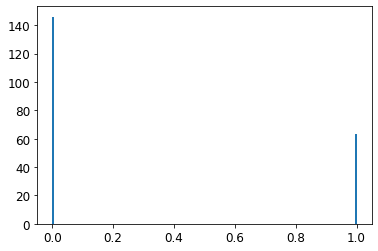

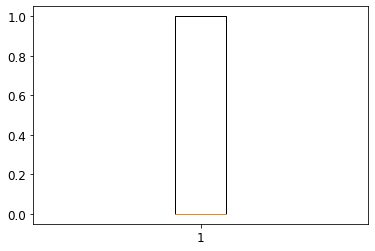

In [9]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins=200)
plt.savefig('results/salida_entrenamiento.pdf', format='pdf', dpi=300)
plt.show()

plt.boxplot(ytrain)
plt.savefig('results/salida_entrenamiento2.pdf', format='pdf', dpi=300)
plt.show()

#podemos deducur que hay mas gente que no fuma,pero este dato no es SUFICIENTE PARA GENERAR UNA PRECDICCION MAS CERTERA.
#POR ESO ANALICE ESTE CASO, HACIENDO GRAFICAS DE PROBABILIDAD DESCRIPTIVA PARA ENTENDER MEJOR MIS VARIABLES DE INTERES.

## 1).los fumadores y el sexo de una persona es un indicador de los eventos de muerte.

In [10]:
'''vamos a interesarnos por la segunda opcion,pues una de la mayoria de las fallas que 
ocurre en el corazon, son a raiz del consumo del tabaco, este es uno de los
grandes problemas que afectan a las personas y puede ser de los que consumen
el tabaco tengan mas decesos de muerte que los otros,por eso lo analizaresmos.'''


fig =px.violin(pincardi, y="age", x="smoking",color="DEATH_EVENT",box= True, points="all",hover_data= pincardi.columns )

fig.update_layout(title_text = "Analisis edad y fumadores- mueren o sobreviven")
plt.savefig('results/analisis_edad_y_fumadores(mueren_o_sobreviven).pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

In [11]:
'''analizaremos cuantas personas fuman y no fuman.'''

fuma = pincardi[pincardi['smoking']==1]
no_fuma = pincardi[pincardi['smoking']==0]

labels = ['No fuma','fuma']
values = [len(no_fuma), len(fuma)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="no fuma - fuma")
plt.savefig('results/no_fuma_Vs_fuma.pdf', format='pdf', dpi=300)
fig.show()

#generraremos una Razón de eventos de muerte por tabaquismo 
fig = px.pie(pincardi, values='smoking',names='DEATH_EVENT', title='Eventos de muerte por fumar')
plt.savefig('Eventos_de_Muerte_por_Fumar.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

In [12]:
#por ultimo un analisis de quienes viven y mueren por fumar o no.

smoking_yes_survi = fuma[pincardi["DEATH_EVENT"]==0]
smoking_yes_not_survi = fuma[pincardi["DEATH_EVENT"]==1]
smoking_no_survi = no_fuma[pincardi["DEATH_EVENT"]==0]
smoking_no_not_survi = no_fuma[pincardi["DEATH_EVENT"]==1]

labels = ['Fumador - Vive','Fumador - No Vive', 'No Fuma - Vive', 'No Fuma- No Vive']
values = [len(fuma[pincardi["DEATH_EVENT"]==0]),len(fuma[pincardi["DEATH_EVENT"]==1]),
         len(no_fuma[pincardi["DEATH_EVENT"]==0]),len(no_fuma[pincardi["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analisi de sobrevivencia-fumadores")
plt.savefig('results/Analisis_de_sobreviviencia-Fumadores.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

In [13]:
'''Podemos concluir que en esta base de datos, hay 203 personas no fumadoras de la cuales 137 sobrevivieron y las otras 66 desafortunadamente fallecieron.

 Luego de las 96 personas que fuman, 66 sobrevivieron y 30 falleciron.'''

'Podemos concluir que en esta base de datos, hay 203 personas no fumadoras de la cuales 137 sobrevivieron y las otras 66 desafortunadamente fallecieron.\n\n Luego de las 96 personas que fuman, 66 sobrevivieron y 30 falleciron.'

In [14]:
# definir columnas tipo string para año y deceso"no necesita decodificar", estdistica
# de pincardi y categorias.

#col_añde = ['age','DEATH_EVENT','sex','smoking']; #columna de año y deceso de una persona

#col_pincardi =['anaemia','creatinine_phosphokinase','diabetes',
#               'ejection_fraction','high_blood_pressure','platelets',
#               'serum_creatinine','serum_sodium']; # estadistica de para
                                   #prediccion de insuficiencia cardiaca.

#cat =  ['sex','smoking']  #categorias     

#items=[]

#for i in cat:
#   items += [list(pincardi[i].value_counts().index)]
#cat_usr = dict(zip(cat,items))   

'''NO HAY NECESIDAD DE CODIFICAR LAS COLUMNAS,PUES EL DATA FRAME YA ESTA 
ADECUADO PARA TRABAJARLO COMO ESTA, NO HAY NECESIDAD DE CODIFICAR.'''



'NO HAY NECESIDAD DE CODIFICAR LAS COLUMNAS,PUES EL DATA FRAME YA ESTA \nADECUADO PARA TRABAJARLO COMO ESTA, NO HAY NECESIDAD DE CODIFICAR.'

In [15]:
#crear clase propia de proceso para prediccion de insuficiencia cardiaca

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


class dummy_picard(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_añde,col_pincardi,): #constructor clase
        self.col_añde = col_añde #lista atributos tipo moneda
        self.col_pincardi = col_pincardi #lista atributos tipo estadistica
        #self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        #print(a)
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador  

        return self
        
    def fit_transform(self,X,*_):
         self.fit(X)
         return self.transform(X)

In [16]:
#dummy = dummy_picard(col_añde=col_añde,col_pincardi=col_pincardi)

#xtrain_pre =dummy.fit_transform(Xtrain)
#Xtrain_pre = dummy.fit_transform(Xtrain)

'''no es necesario crear clase propia de procesos,pues esta base de datos 
ya esta bien organizada y no seria optimo volver a procesar los mismos datos para obtener
los mismos datos,asi que podemos hacer la predicción de la o las variables de 
interes apartir de estos datos.'''

'no es necesario crear clase propia de procesos,pues esta base de datos \nya esta bien organizada y no seria optimo volver a procesar los mismos datos para obtener\nlos mismos datos,asi que podemos hacer la predicción de la o las variables de \ninteres apartir de estos datos.'

In [17]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 224 to 102
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   anaemia                   209 non-null    int64  
 2   creatinine_phosphokinase  209 non-null    int64  
 3   diabetes                  209 non-null    int64  
 4   ejection_fraction         209 non-null    int64  
 5   high_blood_pressure       209 non-null    int64  
 6   platelets                 209 non-null    float64
 7   serum_creatinine          209 non-null    float64
 8   serum_sodium              209 non-null    int64  
 9   sex                       209 non-null    int64  
 10  time                      209 non-null    int64  
 11  DEATH_EVENT               209 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 21.2 KB


 # PREDICCIONDE VARIABLES DE INTERES.



In [18]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
Xtrain_igual_z = sca.fit_transform(Xtrain)

In [19]:
Xtrain_igual_z.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
Xtrain.var(axis=0)

age                         1.364878e+02
anaemia                     2.449393e-01
creatinine_phosphokinase    8.573976e+05
diabetes                    2.405686e-01
ejection_fraction           1.339068e+02
high_blood_pressure         2.298031e-01
platelets                   8.306796e+09
serum_creatinine            1.000036e+00
serum_sodium                1.864589e+01
sex                         2.338057e-01
time                        6.098816e+03
DEATH_EVENT                 2.035793e-01
dtype: float64

In [21]:
red = PCA()
zz = red.fit_transform(Xtrain_igual_z)

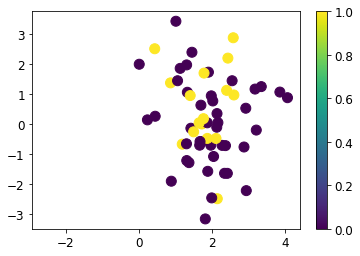

In [22]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['DEATH_EVENT']/(Xtrain['DEATH_EVENT'].max()))
plt.colorbar()
plt.savefig('results/prediccion_De_variable(DEATH_EVENT)_respecto_a_fumadores.pdf', format='pdf', dpi=300)
plt.show()

In [23]:
# PROCESO CON test

Xtest['DEATH_EVENT']

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [24]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 281 to 157
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       90 non-null     float64
 1   anaemia                   90 non-null     int64  
 2   creatinine_phosphokinase  90 non-null     int64  
 3   diabetes                  90 non-null     int64  
 4   ejection_fraction         90 non-null     int64  
 5   high_blood_pressure       90 non-null     int64  
 6   platelets                 90 non-null     float64
 7   serum_creatinine          90 non-null     float64
 8   serum_sodium              90 non-null     int64  
 9   sex                       90 non-null     int64  
 10  time                      90 non-null     int64  
 11  DEATH_EVENT               90 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 9.1 KB


In [25]:
zztest = red.transform(sca.transform((Xtest))) # una sola linea

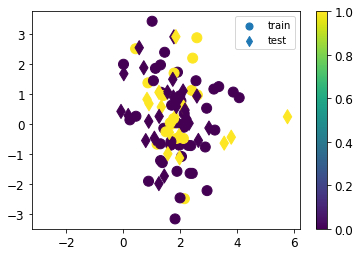

In [26]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['DEATH_EVENT']/(Xtrain['DEATH_EVENT'].max()),label='train')
plt.colorbar()
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest['DEATH_EVENT']/Xtest['DEATH_EVENT'].max(),marker='d',label='test')
plt.legend()
plt.savefig('results/prediccion_De_variable(DEATH_EVENT)Xtrain_Vs_ytest_respecto_a_fumadores.pdf', format='pdf', dpi=300)
plt.show()

In [27]:
# definir modelos de predicción
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge , Lasso
from sklearn.kernel_ridge import KernelRidge
steps = [
         [('scaler', StandardScaler()), #estandarizar cada atributo columna de xtrain centrada en 0 y var = 1
          ('reg', LinearRegression())],
         
         [('scaler',StandardScaler()),
          ('reg',ElasticNet())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
         ('reg',  KernelRidge(alpha=1,gamma=None))], #clasificador 
         
         [ ('scaler', StandardScaler()),
          ('reg', Ridge())],

         [ ('scaler', StandardScaler()),
          ('reg', Lasso())], 
         ]        

#parametros a buscar por busqueda por grilla
parameters =[ 
             {'reg__fit_intercept':[True, False]             
             },
             {
              'reg__alpha': [0,1e-3,1e-2,1e-1,1,10], #parametros n_neighbors debe ser siempre un int
              'reg__l1_ratio':[0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],              
              'reg__gamma':[0,0.25,0.5,0.75,1] 
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],
              'reg__fit_intercept':[True, False]
              #'reg__fit_intercept':[0,0.25,0.5,0.75,1] 
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],
              'reg__fit_intercept':[True, False]
              #'reg__fit_intercept':[0,0.25,0.5,0.75,1]    
             }
              ]

label_model = ['Nor+RegLin','Nor+ElasticNet','Nor+KernelRidge','Nor+Ridge','Nor+Lasso']                    

In [28]:
parameters

[{'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__gamma': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__fit_intercept': [True, False]}]

In [29]:
import os 
pathpre = 'datospre'

try:
 os.mkdir(pathpre)
except:
  print("carpetas resultados ya existe") 

In [30]:
from joblib import dump, load
from sklearn.metrics import mean_absolute_error as msa 
Niter = 20 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto/error
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 


#############################
for j in range(Niter): #outter loop # SI TIENE MENOS DE 1000 DATOS BORRAR ESTE CICLO SOLO CV EN LINEA 16
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_trainj, X_testj, y_trainj, y_testj = train_test_split(Xtrain,ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r],memory=pathpre), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=-1) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          #grid_search.fit(X_trainj,y_trainj)
          grid_search.fit(X_trainj,y_trainj)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_testj)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_testj,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
          
          
      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 
      dump(savedata,'smokingpincardi.joblib')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3755094224512103
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.37086953937056993
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3562726407733377
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37632587890240055
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3762457811680438
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.35854644605075797
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.4223115039165811
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37300362296959116
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.2857142857142857
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.33630479695829624
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/20-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 1}
msa: 0.3345836349154333
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3684277104097356
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.33728777312599006
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3508590848322336
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/20-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 1}
msa: 0.3472514576881731
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.37305213659443637
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.35406057833600574
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.2857142857142857
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3721376505897993
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3593908634014292
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.42730127222617564
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37024979708387085
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.30158730158730157
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.35549610947207116
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3527200565674841
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.37098556800610744
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.3566071063678319
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.2698412698412698
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3167739801950671
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.33052677767323824
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.41398740907006737
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.31673283852131934
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.2857142857142857
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.36973075378753656
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3631128479261211
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3807070026582906
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.36919608775006163
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3667103715585148
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.35634950972715085
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.34691633289343116
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.3676987431489635
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3763657605127252
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.37947451440687
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.4221071399823292
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37807362266356725
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.36507936507936506
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 11/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.34516163964148866
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 11/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.34481634451761417
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 11/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.35023005675499014
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 11/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.34575880420801464
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 11/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 12/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.34516084036566724
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 12/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3387109887760123
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 12/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.36358850436390217
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 12/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.3462918877921426
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 12/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.25396825396825395
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 13/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.4044330253777565
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 13/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3850750845569241
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 13/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.4386719396970226
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 13/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.4004057527802398
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 13/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.3492063492063492
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 14/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3774403550644668
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 14/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.36553378170272255
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 14/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.43718156447627177
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 14/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37728490920708885
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 14/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.3492063492063492
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 15/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3828168912689551
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 15/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3690136741032722
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 15/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.41453287544538375
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 15/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.38159802014565525
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 15/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.30158730158730157
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 16/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3684642903859992
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 16/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.35178140579100836
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 16/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.4377936112744013
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 16/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.3667302346819766
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 16/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.3333333333333333
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 17/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.350288692653036
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 17/20-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 0.5}
msa: 0.34297429743921304
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 17/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.39431939689060924
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 17/20-Modelo 4/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True}
msa: 0.350288692653036
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 17/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.23809523809523808
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 18/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.40359705933378287
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 18/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.3852892766581429
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 18/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.40963920957574856
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 18/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.3985816120753682
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 18/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.31746031746031744
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 19/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.4148711382350638
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 19/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.38536346809564354
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 19/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.443932312992189
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 19/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.4074650766633965
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 19/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.30158730158730157
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 20/20-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.38003501389023264
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 20/20-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.36259165432340656
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 20/20-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.42330486558057917
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 20/20-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 0.37621757989710425
Fitting 5 folds for each of 12 candidates, totalling 60 fits
it 20/20-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': False}
msa: 0.31746031746031744


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


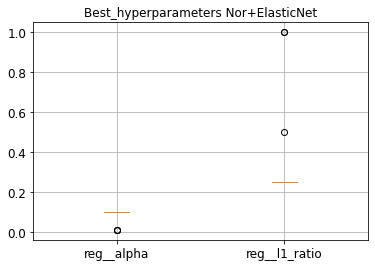

Modes=  [0.1  0.25]


In [43]:
from scipy.stats import mode
from datetime import date

r = 1 #hyperparameters model 0,model 1,model 2,model 3,model 4

nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh)) 
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])
    
    
#revisar numero entero para realizar casting
aa = list(best_hyperpar[0][r].keys())
c = -1
for i in range(len(aa)):
    if aa[i].find('n_neighbors') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.savefig('results/SELECCION_MEJOR_MODELO.pdf', format='pdf', dpi=300)
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Modes= ", mode_hyper)

# Modelo definitivo

Con los mejores hiperparámetros entreno sobre Xtrain completo el modelo final.

EL MEJOR HIPERPARAMETRO PARA ESTE CASO ES 'ElasticNet', ESTE HACE UNA REPRESENTACION MEJOR QUE LOS OTROS HIPERPARAMETROS, PUES LOS OTROS CARECEN DE REPRESENTACION GRAFICA, AUNQUE LOS DATOS PARA GRAFICAR ES NETAMENTE DEPENDIENTE DE LA VARIABLE QUE DECIDIMOS ANALIZAR, EN ESTE CASO (SMOKING Y DEATH_EVET) NO REPRESENTA LOS DATOS COMO LO HACE 'ElasticNet'.

# ESCOGEMOS NUESTRO MODELO DEFINITIVO: 'ElasticNet'

In [32]:
r = 1 #camino elastic net
steps_final = [('scaler',StandardScaler()),
               ('reg',ElasticNet(alpha=0.01,l1_ratio=0))]  
         
modelo_final = Pipeline(steps_final)
modelo_final.fit(Xtrain,ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

# evaluación datos nuevos para un caso real.

In [33]:
ytest_e = modelo_final.predict(Xtest) #simular casos nuevos

In [34]:
print('MAE_test=', msa(ytest,ytest_e))

MAE_test= 0.38679346100418


In [35]:
pathpre = 'resultados'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [36]:
import shutil
from joblib import dump, load
from datetime import date, datetime
from google.colab import files

modelo_final = {'modelo':modelo_final,
          'pasos':label_model[1],
          'mae_test':msa(ytest,ytest_e),
            } 

dump(modelo_final,'resultados/modelo_final.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__modelo'
shutil.make_archive(namefile, 'zip', 'resultados')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>